In [23]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('Behavioral data3.csv')

df_majority = df[df['Privacy Exists']==0]
df_minority = df[df['Privacy Exists']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5250,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled.iloc[:, 1:-1].values
Y = df_downsampled.iloc[:, -1:].values


scaler = StandardScaler(); X = scaler.fit_transform(X)
print(X.shape)
X_new = SelectKBest(f_classif, k=102).fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 5)

(7691, 102)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr'),
    'Random Forest': RandomForestClassifier(n_estimators=130, max_depth = 100, min_samples_split = 6,min_samples_leaf = 3, bootstrap = False,max_features = 'auto'),
    'Decision Trees' : DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,max_features=None,random_state=42),
    'Neural Networks': MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,50), max_iter=650),
    'SVM' : SVC(kernel = "poly", degree = 3, coef0=1, C=5),
    'Linear SVM' : LinearSVC(),
    'Naive Bayes' : GaussianNB(var_smoothing=1e-9),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, subsample=0.8 ,min_samples_split=6 ,max_features=40),
    'K-Nearest Neighbor' : KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2),
    'AdaBoost' : AdaBoostClassifier(n_estimators=125,learning_rate = 0.4),
    'QDA' : QuadraticDiscriminantAnalysis()
}


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


for name, model in models.items():
    print('Training', name)

    clf = model
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train = cross_val_score(clf, y_train, y_pred_train, cv=3)
    print('train cross val',scores_train.mean())
    scores_test = cross_val_score(clf, y_test, y_pred_test, cv=3)
    print('test cross val',scores_test.mean())

    scores_train = accuracy_score(y_train, y_pred_train)
    print('train acc',scores_train.mean())
    scores_test = accuracy_score(y_test, y_pred_test)
    print('test acc',scores_test.mean())
    print('\n')


Training Logistic Regression
train cross val 0.9146306374626398
test cross val 0.919544065060379
train acc 0.7883012359873527
test acc 0.7780757626550453


Training Random Forest
train cross val 0.9918083002483234
test cross val 0.8846799389300628
train acc 0.9918079908019546
test acc 0.8243379148508213


Training Decision Trees
train cross val 0.9244036024247472
test cross val 0.9379819958275618
train acc 0.7972118424834722
test acc 0.7877975192758967


Training Neural Networks
train cross val 0.9486924605829902
test cross val 0.7891385161892628
train acc 0.9486921529175051
test acc 0.7817633255112303


Training SVM
train cross val 0.9117562688039335
test cross val 0.9171976583116791
train acc 0.8262431733256683
test acc 0.7877975192758967


Training Linear SVM
train cross val 0.911468850525147
test cross val 0.9151862599381886
train acc 0.7877263581488934
test acc 0.7770700636942676


Training Naive Bayes
train cross val 0.9057200512507868
test cross val 0.9138452153456754
train acc 

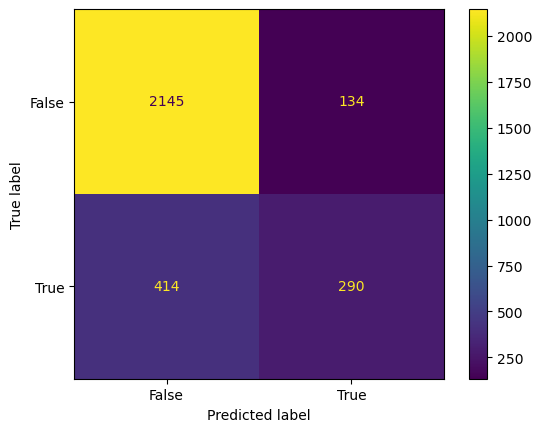

<Figure size 640x480 with 0 Axes>

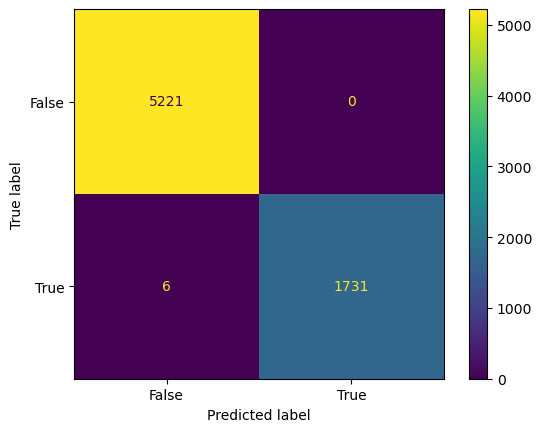

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.figure()

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()

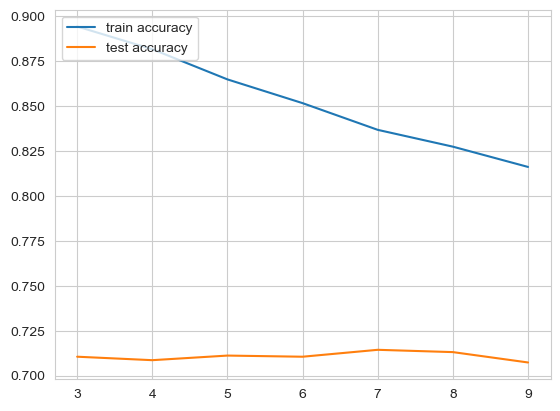

In [35]:
#hyperparameter Tune!!!!!!!!!!!!!!!!
import seaborn as sns
import matplotlib.pyplot as plt

train_accs_cross = []
test_accs_cross = []


rng = list(range(3,10,1))
#rng = [i / 10 for i in range(2,10,2)]
#rng = [1e-9, 1e-8, 1e-7]
#rng = [3]
#hidden = [(256,64),(256,128,64,32,16,8),(128,4), (100,50),]
#(128,4)(100,50)

for tst in rng:

    clf = RandomForestClassifier(n_estimators=120, max_depth = 16, min_samples_split = 5 ,min_samples_leaf = 8)
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train_cross = cross_val_score(clf, y_train, y_pred_train, cv=3).mean()
    scores_test_cross = cross_val_score(clf, y_test, y_pred_test, cv=3).mean()
    
    scores_train_asaf = accuracy_score(y_train, y_pred_train).mean()
    scores_test_asaf = accuracy_score(y_test, y_pred_test).mean()

    train_accs_cross.append(scores_train_cross)
    test_accs_cross.append(scores_test_cross)

plt.figure()
sns.set_style("whitegrid")
plt.plot(rng,train_accs_cross, label="train accuracy")
plt.plot(rng,test_accs_cross, label="test accuracy")
#plt.plot(list(range(1,len(hidden)+1)),train_accs_cross, label="train accuracy")
#plt.plot(list(range(1,len(hidden)+1)),test_accs_cross, label="test accuracy")
plt.legend(loc="upper left")
plt.show()
